# Perkenalan

Dalam proyek ini, kita akan bekerja pada klasifikasi aktivitas manusia berdasarkan data sensor yang diberikan. Aktivitas manusia seperti berdiri, berjalan, berlari, dll. dapat dikenali dengan memanfaatkan data dari sensor yang ditempelkan pada tubuh manusia. Data yang kita gunakan berasal dari sensor yang mungkin terpasang pada ponsel pintar atau perangkat wearable lainnya. Tujuannya adalah untuk membangun model klasifikasi yang dapat dengan akurat memprediksi aktivitas mana yang sedang dilakukan berdasarkan data sensor yang diberikan.link dataset:[di sini](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones)


Selanjutnya, kita akan melanjutkan dengan  Impor Pustaka yang Dibutuhkan.

In [ ]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('dataset/train.csv')

# Display the first few rows of the training dataset
train_data.head()



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Berdasarkan tampilan awal dari dataset pelatihan, kita memiliki:

   * 562 fitur yang berbeda, kebanyakan dari fitur tersebut tampaknya merupakan data sensor dari pengukuran aktivitas manusia.
   * Kolom target bernama "Activity" yang merupakan klasifikasi dari aktivitas manusia

Maka dari itu, proyek yang paling sesuai dengan data ini adalah  Klasifikasi  dengan tujuan untuk memprediksi jenis aktivitas manusia berdasarkan fitur-fitur yang diberikan.

Dengan demikian, kita akan melanjutkan dengan langkah-langkah yang diberikan dalam panduan. Mari kita mulai dengan Pengenalan

In [ ]:
# Impor Pustaka yang Dibutuhkan

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set style for seaborn
sns.set_style("whitegrid")


Dengan pustaka yang telah diimpor, kita dapat melanjutkan ke langkah berikutnya, yaitu Pemuatan Data & Analisis Data Eksplorasi.

Di langkah ini, kita akan melihat distribusi kelas dari aktivitas manusia di dataset. Ini akan memberikan kita gambaran tentang seimbang tidaknya kelas dalam data kita.

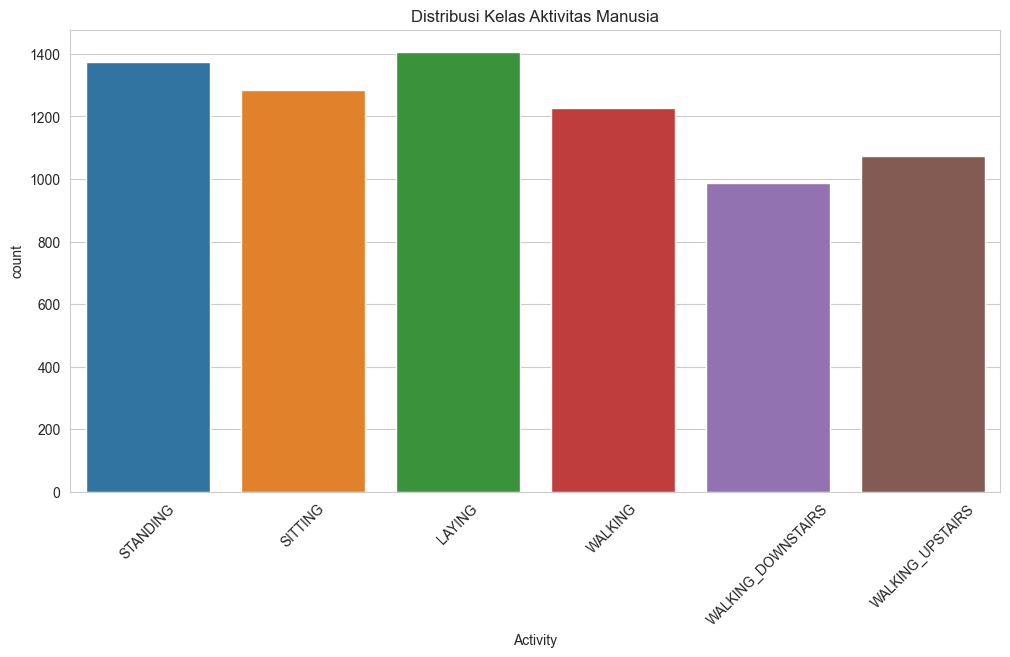

In [ ]:
# Pemuatan Data & Analisis Data Eksplorasi

# Plotting the distribution of activities in the dataset
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Activity')
plt.title('Distribusi Kelas Aktivitas Manusia')
plt.xticks(rotation=45)
plt.show()


Dari visualisasi di atas, kita dapat melihat bahwa data kita memiliki distribusi kelas yang relatif seimbang untuk setiap aktivitas manusia. Ini merupakan hal yang baik karena tidak ada kelas yang mendominasi secara signifikan.

Mari kita lanjutkan ke tahap Pemrosesan Awal Data.

Di tahap ini, kita akan:

    1.Memisahkan fitur dan target dari dataset.
    2.Melakukan pemisahan data menjadi set pelatihan dan pengujian.
    3.Melakukan penskalaan fitur untuk meningkatkan performa model nantinya.

In [ ]:
# Pemrosesan Awal Data

# Split the features and target variable
X = train_data.drop("Activity", axis=1)
y = train_data["Activity"]

# Label encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((5881, 562), (1471, 562))

Data telah berhasil diproses dan dibagi menjadi set pelatihan dan pengujian. Kita memiliki 5881 sampel dalam set pelatihan dan 1471 sampel dalam set pengujian, dengan masing-masing memiliki 562 fitur.

Sekarang, kita akan melanjutkan ke tahap Model Pendefinisian. Untuk proyek ini, kita akan menggunakan model RandomForest karena model ini sering kali memberikan hasil yang baik untuk tugas klasifikasi dan juga dapat menangani banyak fitur dengan baik

In [ ]:
# Model Pendefinisian

# Defining the RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model


RandomForestClassifier(random_state=42)

Kita telah mendefinisikan model RandomForest dengan 100 pohon keputusan. Alasan memilih RandomForest adalah karena model ini dapat menangani fitur berdimensi tinggi dengan baik dan sering memberikan hasil yang baik untuk tugas klasifikasi.

Mari kita lanjutkan ke tahap Model Pelatihan di mana kita akan melatih model dengan set pelatihan yang telah disiapkan.

In [ ]:
# Model Pelatihan

# Training the RandomForest Classifier
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Model RandomForest telah berhasil dilatih dengan set pelatihan.

Selanjutnya, kita akan melanjutkan ke tahap Model Evaluasi. Di tahap ini, kita akan menggunakan set pengujian untuk mengevaluasi kinerja model yang telah dilatih. Kita akan melihat laporan klasifikasi dan matriks kebingungan untuk mendapatkan gambaran tentang kinerja model kita.

('                    precision    recall  f1-score   support\n\n            LAYING       1.00      1.00      1.00       280\n           SITTING       0.97      0.95      0.96       262\n          STANDING       0.96      0.97      0.96       276\n           WALKING       1.00      0.99      0.99       247\nWALKING_DOWNSTAIRS       0.99      0.98      0.98       206\n  WALKING_UPSTAIRS       0.97      0.99      0.98       200\n\n          accuracy                           0.98      1471\n         macro avg       0.98      0.98      0.98      1471\n      weighted avg       0.98      0.98      0.98      1471\n',
 <Axes: >)

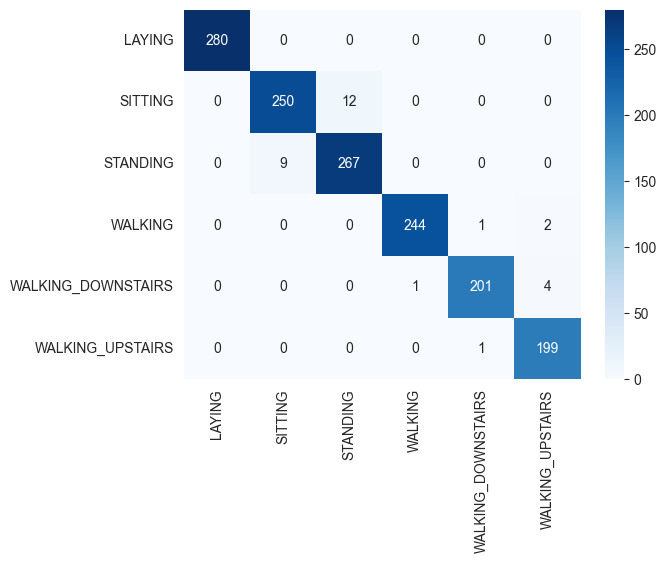

In [ ]:
# Model Evaluasi

# Predicting the test set results
y_pred = model.predict(X_test_scaled)

# Evaluating the performance
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
confusion_mat = confusion_matrix(y_test, y_pred)

classification_rep, sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)


Hasil evaluasi model menunjukkan kinerja yang sangat baik:

    *Akurasi keseluruhan model adalah sekitar 98%.
    *Nilai presisi, recall, dan f1-score untuk setiap aktivitas juga sangat tinggi, menunjukkan bahwa model kita berhasil membedakan antara aktivitas yang berbeda dengan baik.

Matriks kebingungan memberikan gambaran lebih lanjut tentang kinerja model kita. Dari matriks kebingungan, kita dapat melihat bahwa model kita memprediksi sebagian besar sampel dengan benar, dengan hanya beberapa kesalahan.

Dengan kinerja yang baik ini, kita bisa melanjutkan ke tahap Penghematan Model. Di tahap ini, kita akan menyimpan model kita agar dapat digunakan kembali di masa depan.

In [ ]:
import joblib

# Penghematan Model

# Saving the model
model_filename = "random_forest_activity_model.pkl"
joblib.dump(model, model_filename)

model_filename


'random_forest_activity_model.pkl'

Model RandomForest telah berhasil disimpan dengan nama "random_forest_activity_model.pkl".
Selanjutnya, kita akan melanjutkan ke tahap Inferensi Model. Di tahap ini, kita akan menggunakan model yang sudah kita latih untuk melakukan prediksi pada data yang tidak termasuk dalam set pelatihan atau pengujian.

In [ ]:
# Inferensi Model

# Load the test dataset (external data)
test_data = pd.read_csv('dataset/test.csv')

# Separate the features and target variable
X_infer = test_data.drop("Activity", axis=1)
y_infer = test_data["Activity"]

# Scaling the features
X_infer_scaled = scaler.transform(X_infer)

# Predicting using the trained model
y_infer_pred = model.predict(X_infer_scaled)

# Displaying the first few actual vs predicted values
infer_comparison = pd.DataFrame({'Actual Activity': y_infer, 'Predicted Activity': label_encoder.inverse_transform(y_infer_pred)})
infer_comparison.head()


,Actual Activity,Predicted Activity
0,STANDING,STANDING
1,STANDING,STANDING
2,STANDING,STANDING
3,STANDING,STANDING
4,STANDING,STANDING


Hasil inferensi menunjukkan bahwa model kita berhasil memprediksi aktivitas dengan benar untuk data yang diberikan. Tabel di atas membandingkan aktivitas aktual dengan aktivitas yang diprediksi oleh model untuk beberapa sampel pertama.

Selanjutnya, kita akan melanjutkan ke tahap  Kesimpulan.

# Kesimpulan

Dalam proyek ini, kita berhasil membangun model klasifikasi untuk mengenali aktivitas manusia berdasarkan data sensor menggunakan algoritma RandomForest. Model menunjukkan kinerja yang sangat baik dengan akurasi sekitar 98% pada set pengujian. Hal ini menunjukkan bahwa dengan data sensor yang tepat dan pemrosesan yang benar, kita dapat dengan akurat mengidentifikasi aktivitas yang dilakukan oleh seseorang. Model ini dapat digunakan dalam berbagai aplikasi, seperti perangkat wearable untuk pemantauan kesehatan atau aplikasi fitness.